In [1]:
from nltk.util import ngrams
from pycipher import ColTrans
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import multiprocessing
import string
from textwrap import wrap

cipher_text = ""
with open('cipher.txt', 'r') as ct_file:
  cipher_text = ct_file.read().replace("\n", "")

In [2]:
print(cipher_text)

TOTETHEOERNETIOFHIARSUGSTOTAANSFUSBPNDMISPONAESETEAAHONTLCHLIITCUTDUTWDISPLPHERAETURHLOAHRSCWWVUEFSTOUISSETECAKAIFOIOOLAEPDRFEOEROHOAOMTAOSEVESAEOCOCDSNATTITNTAWHMFHSEMWAEKHUALAGTSTEELBHHEFENTETNCRUYMSUOVETSZTINKSHEHIWVAYTSTNOTCCCEKWSSAHHTHFOISKDWTAAFUANPEGTHMNTIGTRRSNYLTAFIOOWFOLYIYSBLIEBOEROTBTAITEUSINHTETSOLRNHMNTSFETELNSNARWOOTAEUFRUEROAERSGISAEOTOBEADYPOIGNTETDEOLENMRADYSEPOAWEDHHATCENTEHUADAUASOKTAFEHSEROIAOSMAINEOTYOEIHTDEOLETSEPECACTDEMYHRSHRBOITASEPFETWADEMMYOEHNEAEHFLDFTIMRACIMSGVUPUEHRSHRSETHTAECLMTOSLNLFFRHWUDERHWISNSONOTMTEPRSOSRNTERUMNCNUEYHPNSFEPSDOEHLWDLYHISLNEFFIENTEPRSHTAINMRTFHUWRHTKSHNEISLMGTIQITSAEIHBRBDIWOOLFRESERORNADWAUDRWAYIEUTATERAOSMTIGFEDAHHUDSOEDONRFOWOEORNTAELREUNPZLSHWLADAEURTEBATOELSEAEHNLTOHRTAWKONTFHSOSINEOSAEOADOUALNTUTEAIEUORSLTOISCLEORIHHPLCSOTOGTNETRRSSFRAPTADOETIHHSEADHICRETTRARADOEHNMOATOSFYUOTEARPEINMHNHOIOSELMSNRMMEDBNOHSQTWHIBIEDURSGDOFROONTKMATARLNOSEHOTEOEBLTYNERHDTSNRHSTSHTSNMOVLBSOTEOERNOATEEFNTEDHTAAMEHSFOHOLLTEATEEPTMSAYOGEWOBTHACSIHPSWG

In [3]:
unigram_cipher = list(cipher_text)

In [4]:
unigram_counter = Counter()
for letter in unigram_cipher:
    unigram_counter[letter] += 1

The alphabet has **24 symbols**.

In [5]:
alphabet_list = list(unigram_counter)
alphabet_list.sort()
print(alphabet_list)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'Z']


The **top-5 most common unigrams** are E, T, O, S and A. This suggests that the language of the plaintext might be **English**.

In [6]:
unigram_counter.most_common(5)

[('E', 146), ('T', 120), ('O', 99), ('S', 88), ('A', 87)]

In [7]:
unigram_df = pd.DataFrame.from_dict(unigram_counter, orient='index', columns=["unigram_count"]).sort_index()

In [8]:
# Columns will be the relative frequencies of the letters from the ciphertext and English language.
compare_unigram_df = pd.DataFrame()
# Read English letters counts from "War and Peace"
# Credits to http://practicalcryptography.com/ for the txt file
eng_unigram_df = pd.read_csv("eng_unigrams.txt", sep=" ", names=["unigram", "unigram_count"], index_col="unigram").sort_index()
compare_unigram_df["eng_rel_freq_perc"] = eng_unigram_df.unigram_count.apply(lambda x: (x / eng_unigram_df.unigram_count.sum()) * 100.0)
compare_unigram_df["cipher_rel_freq_perc"] = unigram_df.unigram_count.apply(lambda x: (x / unigram_df.unigram_count.sum()) * 100.0)

Since the ciphertext is quite long, the relative frequency distribution of unigrams strongly suggests that the language is English. 

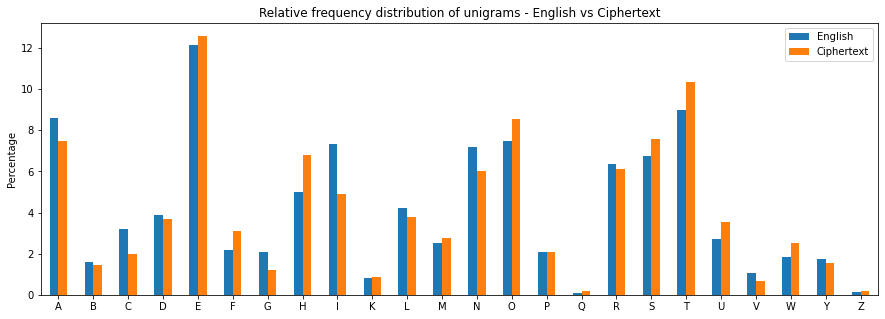

In [9]:
compare_unigram_df.rename(columns={"eng_rel_freq_perc": "English", "cipher_rel_freq_perc": "Ciphertext"}, inplace=True)
ax = compare_unigram_df.plot(kind="bar", secondary_y="eng_rel_freq_perc", figsize=(15,5), rot=0)
ax.set_title("Relative frequency distribution of unigrams - English vs Ciphertext")
ax.set_ylabel("Percentage")
ax.xaxis.label.set_visible(False)

Another tool that might help us **determine the degree of masking** caused by the encryption is the relative frequency distribution of each letter of the alphabet against the most common letter found earlier, E. Analyzing the plot it is easy to see that the ciphertext has a low degree of masking. Based on what we have said so far, it is quite likely that the cipher used is a **transposition cipher**. 

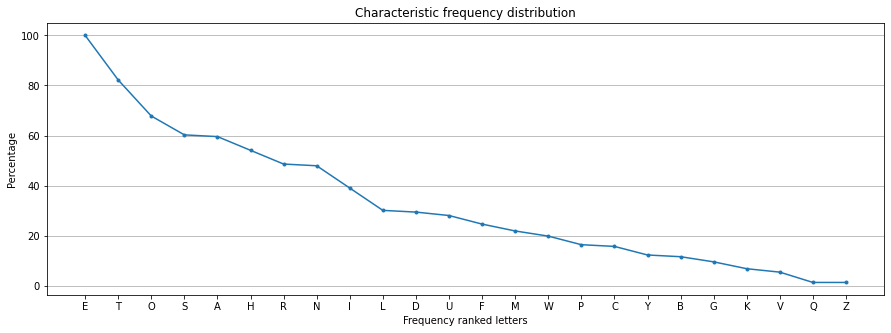

In [10]:
unigram_df["ranked_freq_perc"] = unigram_df.unigram_count.apply(lambda x: (x / unigram_df.unigram_count.loc["E"]) * 100.0)
unigram_df.sort_values(by="ranked_freq_perc", ascending=False, inplace=True)
ax = unigram_df.plot(y="ranked_freq_perc", grid=True, style='.-', figsize=(15,5), legend=None)
ax.set_title("Characteristic frequency distribution")
ax.set_ylabel("Percentage")
ax.set_xlabel("Frequency ranked letters")
# Override the x-axis labels inferred by pandas
ax.set_xticks(range(unigram_df.shape[0]))
ax.set_xticklabels(unigram_df.index.values)
ax.grid(axis='x')
plt.show()

After some pen and paper "trial and error", the cipher has been identified (e.g. **rail-fence cipher**) and a key consisting of 3 "rails" revealed the plain text. Check the fence layout in "solution.txt".